In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.collections
import datetime, os, bz2, lzma, pickle
import numpy as np
import descartes
import opencrimedata.chicago
import open_cp.sources.chicago
import open_cp.data
import open_cp.geometry
import open_cp.plot

In [4]:
datadir = os.path.join("..", "..", "..", "..", "Data")
#datadir = os.path.join("/media", "disk", "Data")

## The geometry we'll use

South side of Chicago, as ever.

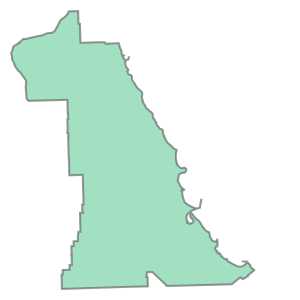

In [17]:
open_cp.sources.chicago.set_data_directory(datadir)
geo = open_cp.sources.chicago.get_side("South")
geo

## Load the points

And clip to the geometry

In [18]:
def gen():
    with lzma.open(os.path.join(datadir, "chicago_all.csv.xz"), "rt") as f:
        for row in opencrimedata.chicago.load_only_with_point(f):
            if row.crime_type == "BURGLARY":
                yield row
                
times = []
points = []
for row in gen():
    times.append(row.datetime)
    points.append(row.point)

In [19]:
proj = opencrimedata.chicago.projector()
points = np.asarray(proj(*np.asarray(points).T)).T
points.shape

(369948, 2)

In [22]:
points = open_cp.data.TimedPoints.from_coords(*open_cp.data.order_by_time(times, points.T[0], points.T[1]))

In [27]:
points = open_cp.geometry.intersect_timed_points(points, geo)

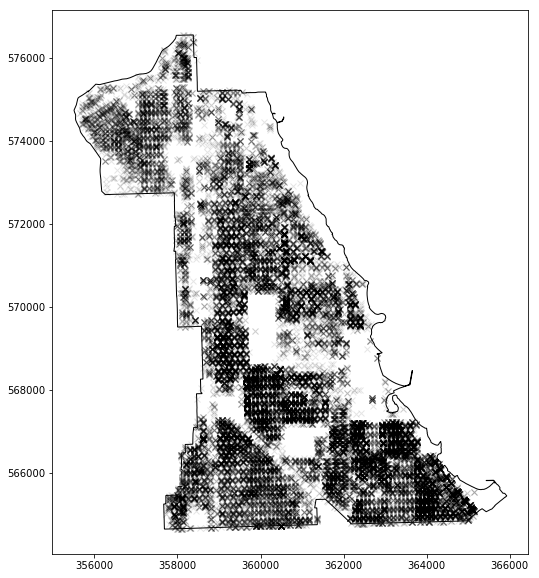

In [31]:
fig, ax = plt.subplots(figsize=(10,10))

ax.add_patch(descartes.PolygonPatch(geo, fc="none"))
ax.set_aspect(1)
ax.scatter(points.xcoords, points.ycoords, marker="x", color="black", linewidth=1, alpha=0.1)

## Look at the year 2007

For a change...

In [33]:
start=datetime.datetime(2007,1,1)
end=datetime.datetime(2008,1,1)
points = points[(points.timestamps >= start) & (points.timestamps < end)]

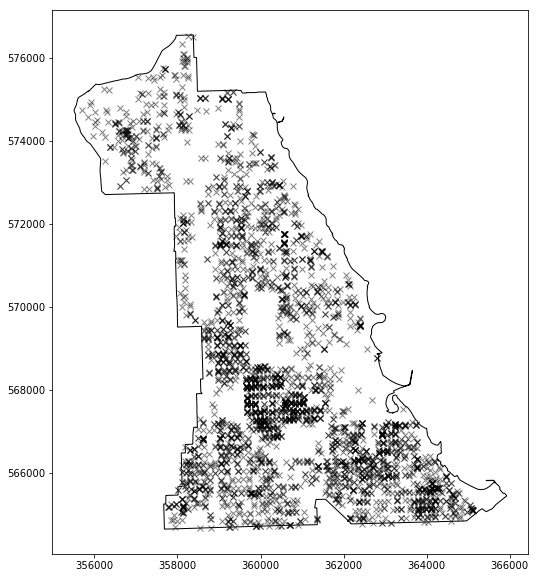

In [35]:
fig, ax = plt.subplots(figsize=(10,10))

ax.add_patch(descartes.PolygonPatch(geo, fc="none"))
ax.set_aspect(1)
ax.scatter(points.xcoords, points.ycoords, marker="x", color="black", linewidth=1, alpha=0.5)

## Pickle out

So our scripts can reload easily

In [46]:
with bz2.open("geo.pic.bz", "w") as f:
    pickle.dump(geo, f)
with bz2.open("points1.pic.bz", "w") as f:
    pickle.dump(points, f)

## Specify a grid

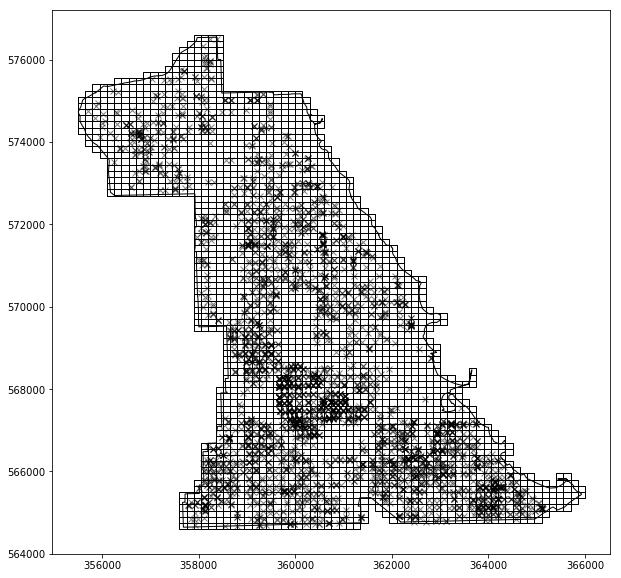

In [44]:
grid = open_cp.data.Grid(xsize=150, ysize=150, xoffset=0, yoffset=0)
grid = open_cp.geometry.mask_grid_by_intersection(geo, grid)

fig, ax = plt.subplots(figsize=(10,10))

pc = matplotlib.collections.PatchCollection(open_cp.plot.patches_from_grid(grid),
                                            edgecolors="black", facecolors="none")
ax.add_collection(pc)

p = descartes.PolygonPatch(geo, fc="none", ec="black", linewidth=1)
ax.add_patch(p)
ax.scatter(points.xcoords, points.ycoords, marker="x", linewidth=1, color="black", alpha=0.5)

## Network flow

In [57]:
def gen():
    filename = os.path.join(datadir, "Chicago_redist_network_flow.csv.xz")
    with lzma.open(filename, "rt", encoding="utf8") as f:
        for row in opencrimedata.chicago.load_only_with_point(f):
            if row.crime_type == "BURGLARY":
                yield row
        
times = []
points = []
for row in gen():
    times.append(row.datetime)
    points.append(row.point)
    
points = np.asarray(proj(*np.asarray(points).T)).T
points = open_cp.data.TimedPoints.from_coords(*open_cp.data.order_by_time(times, points.T[0], points.T[1]))
points = points[(points.timestamps >= start) & (points.timestamps < end)]
points = open_cp.geometry.intersect_timed_points(points, geo)

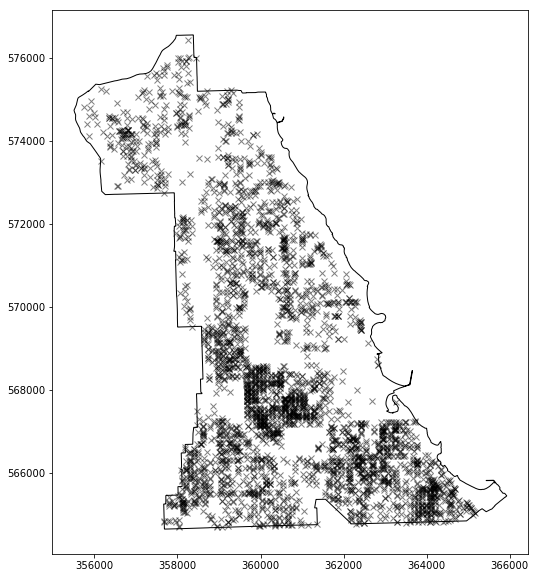

In [58]:
fig, ax = plt.subplots(figsize=(10,10))

ax.add_patch(descartes.PolygonPatch(geo, fc="none"))
ax.set_aspect(1)
ax.scatter(points.xcoords, points.ycoords, marker="x", color="black", linewidth=1, alpha=0.5)

In [59]:
with bz2.open("points2.pic.bz", "w") as f:
    pickle.dump(points, f)

## Assigned to buildings

In [60]:
def gen():
    filename = os.path.join(datadir, "chicago_redist_network_flow_to_buildings_network.csv.xz")
    with lzma.open(filename, "rt", encoding="utf8") as f:
        for row in opencrimedata.chicago.load_only_with_point(f):
            if row.crime_type == "BURGLARY":
                yield row
        
times = []
points = []
for row in gen():
    times.append(row.datetime)
    points.append(row.point)
    
points = np.asarray(proj(*np.asarray(points).T)).T
points = open_cp.data.TimedPoints.from_coords(*open_cp.data.order_by_time(times, points.T[0], points.T[1]))
points = points[(points.timestamps >= start) & (points.timestamps < end)]
points = open_cp.geometry.intersect_timed_points(points, geo)

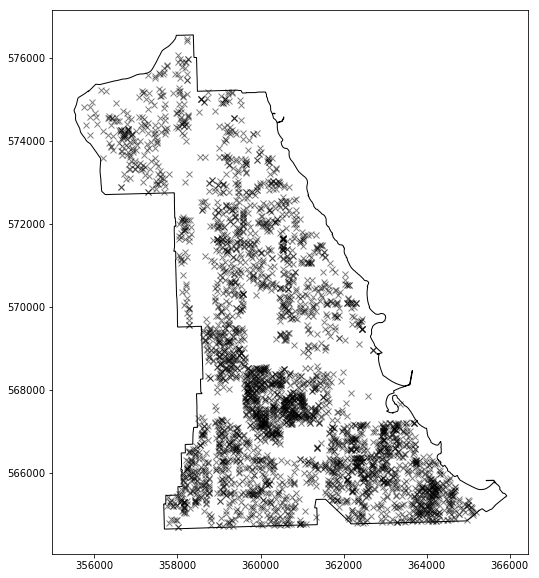

In [61]:
fig, ax = plt.subplots(figsize=(10,10))

ax.add_patch(descartes.PolygonPatch(geo, fc="none"))
ax.set_aspect(1)
ax.scatter(points.xcoords, points.ycoords, marker="x", color="black", linewidth=1, alpha=0.5)

In [62]:
with bz2.open("points3.pic.bz", "w") as f:
    pickle.dump(points, f)

## Reload and check

In [66]:
with bz2.open("points1.pic.bz") as f:
    points1 = pickle.load(f)
points1.time_range, points1.number_data_points

((numpy.datetime64('2007-01-01T02:00:00.000'),
  numpy.datetime64('2007-12-31T21:00:00.000')),
 3545)

In [67]:
with bz2.open("points2.pic.bz") as f:
    points2 = pickle.load(f)
points2.time_range, points2.number_data_points

((numpy.datetime64('2007-01-01T02:00:00.000'),
  numpy.datetime64('2007-12-31T21:00:00.000')),
 3556)

In [68]:
with bz2.open("points3.pic.bz") as f:
    points3 = pickle.load(f)
points3.time_range, points3.number_data_points

((numpy.datetime64('2007-01-01T02:00:00.000'),
  numpy.datetime64('2007-12-31T21:00:00.000')),
 3564)

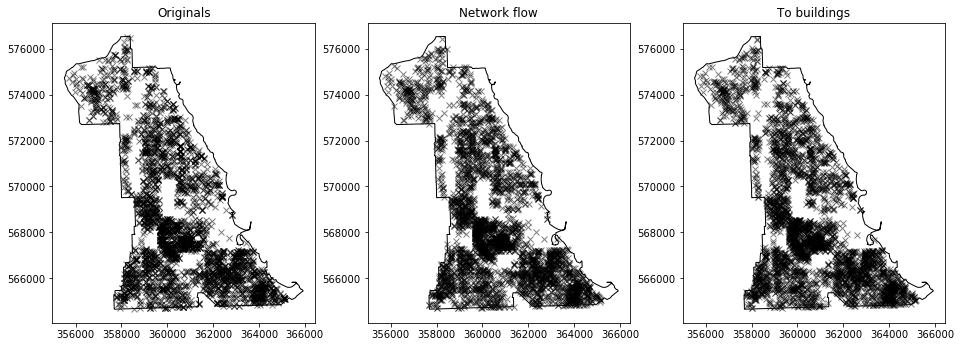

In [71]:
fig, axes = plt.subplots(ncols=3, figsize=(16,10))

for ax, points in zip(axes, [points1, points2, points3]):
    ax.add_patch(descartes.PolygonPatch(geo, fc="none"))
    ax.set_aspect(1)
    ax.scatter(points.xcoords, points.ycoords, marker="x", color="black", linewidth=1, alpha=0.5)
axes[0].set_title("Originals")
axes[1].set_title("Network flow")
axes[2].set_title("To buildings")